# BIOS 534 homework2

#### 1. Loading the data and preprocessing

In [25]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from hyperas import optim
from hyperas.distributions import choice
from hyperopt import Trials, STATUS_OK, tpe
import pandas as pd
import sys, os, shutil
print(tf.__version__)
print(sys.version_info)

1.13.1
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


In [26]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images_all, train_labels_all), (test_images, test_labels) =fashion_mnist.load_data()

train_images, valid_images, train_labels, valid_labels =train_test_split(train_images_all, train_labels_all,
                                                                         test_size=0.2, random_state=42)

# scale data
train_images = train_images / 255.0
valid_images = valid_images /255.0
test_images = test_images / 255.0

In [27]:
# Number of images in the training set and the testing set.
train_images_all.shape[0]

60000

In [28]:
test_images.shape[0]

10000

In [29]:
# Number of classes in the training set and the testing set
len(np.unique(train_labels_all))

10

In [30]:
len(np.unique(test_labels))

10

#### 2. Fully connected neural network

In [31]:
def data():
    fashion_mnist = keras.datasets.fashion_mnist
    (x_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,test_size=0.2,random_state=42)
    X_train = x_train / 255.0
    X_valid = x_valid /255.0
    return X_train, y_train, X_valid, y_valid      

In [32]:
def model_select1(X_train, y_train, X_valid, y_valid):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation={{choice(['relu', 'sigmoid'])}}))
    model.add(keras.layers.Dense(100, activation={{choice(['relu', 'sigmoid'])}}))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],
                  optimizer={{choice(['adam', 'sgd', 'rmsprop'])}})
    model.fit(X_train, y_train, epochs=10, verbose=0,validation_data=(X_valid, y_valid))
    score, acc = model.evaluate(X_valid, y_valid, verbose=0)
    print ('Test accuracy:',acc)
    return {'loss': -acc,'status': STATUS_OK, 'model': model}

best_run1, best_model1 = optim.minimize(model=model_select1,
                                        data=data,
                                        algo=tpe.suggest,
                                        max_evals=12,
                                        trials=Trials(),
                                        notebook_name='hw2')

>>> Imports:
#coding=utf-8

try:
    import warnings
except:
    pass

try:
    import matplotlib as mpl
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import sklearn
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import sys, os, shutil
except:
    pass

try:
    import warnings
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.svm import SVC
except:
    pass

try:

In [33]:
print(best_run1)

{'activation': 0, 'activation_1': 1, 'optimizer': 0}


In [34]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
model1.add(keras.layers.Dense(300, activation='relu'))
model1.add(keras.layers.Dense(100, activation='sigmoid'))
model1.add(keras.layers.Dense(10, activation='softmax'))
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
logdir = "/Users/mengjiawei/Desktop/534/log_dir_classification"
output_model_fn = os.path.join(logdir, "q1_model1.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_fn, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

history = model1.fit(train_images, train_labels, epochs=10,verbose=2,
validation_data=(valid_images, valid_labels),callbacks=callbacks)
print(history.history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.5118 - acc: 0.8193 - val_loss: 0.4129 - val_acc: 0.8489
Epoch 2/10
 - 6s - loss: 0.3646 - acc: 0.8654 - val_loss: 0.3448 - val_acc: 0.8741
Epoch 3/10
 - 6s - loss: 0.3267 - acc: 0.8790 - val_loss: 0.3326 - val_acc: 0.8792
Epoch 4/10
 - 6s - loss: 0.2973 - acc: 0.8890 - val_loss: 0.3304 - val_acc: 0.8800
Epoch 5/10
 - 6s - loss: 0.2787 - acc: 0.8966 - val_loss: 0.3173 - val_acc: 0.8822
Epoch 6/10
 - 6s - loss: 0.2640 - acc: 0.9009 - val_loss: 0.3197 - val_acc: 0.8834
Epoch 7/10
 - 6s - loss: 0.2503 - acc: 0.9066 - val_loss: 0.3219 - val_acc: 0.8863
Epoch 8/10
 - 6s - loss: 0.2380 - acc: 0.9098 - val_loss: 0.3078 - val_acc: 0.8888
Epoch 9/10
 - 6s - loss: 0.2259 - acc: 0.9148 - val_loss: 0.2938 - val_acc: 0.8949
Epoch 10/10
 - 6s - loss: 0.2189 - acc: 0.9179 - val_loss: 0.3112 - val_acc: 0.8893
{'loss': [0.5117634560614824, 0.36455098653584717, 0.32671525598565737, 0.29725250179568924, 0.27872901887943347, 0.264

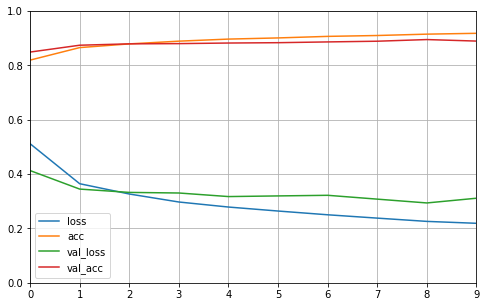

In [35]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [40]:
def model_select2(X_train, y_train, X_valid, y_valid):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(500, activation=
                                 {{choice(['relu', 'sigmoid'])}}))
    model.add(keras.layers.Dense(200, activation=
                                 {{choice(['relu', 'sigmoid'])}}))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        loss='sparse_categorical_crossentropy', metrics=['accuracy'],
        optimizer={{choice(['adam', 'sgd', 'rmsprop'])}})
    model.fit(X_train, y_train, epochs=10, verbose=0,
              validation_data=(X_valid, y_valid))
    score, acc = model.evaluate(X_valid, y_valid, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc,'status': STATUS_OK, 'model': model}

best_run2, best_model2 = optim.minimize(model=model_select2,
                                        data=data,
                                        algo=tpe.suggest,
                                        max_evals=12,
                                        trials=Trials(),
                                        notebook_name='hw2')

>>> Imports:
#coding=utf-8

try:
    import warnings
except:
    pass

try:
    import matplotlib as mpl
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import sklearn
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import sys, os, shutil
except:
    pass

try:
    import warnings
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.svm import SVC
except:
    pass

try:

In [41]:
print(best_run2)

{'activation': 1, 'activation_1': 0, 'optimizer': 0}


In [42]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(500, activation='sigmoid'))
model2.add(keras.layers.Dense(200, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
logdir = "/Users/mengjiawei/Desktop/534/log_dir_classification"
output_model_fn = os.path.join(logdir, "q1_model2.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_fn, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

history = model2.fit(train_images, train_labels, epochs=10,verbose=2,
validation_data=(valid_images, valid_labels),callbacks=callbacks)
print(history.history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 14s - loss: 0.5236 - acc: 0.8104 - val_loss: 0.4055 - val_acc: 0.8506
Epoch 2/10
 - 10s - loss: 0.3866 - acc: 0.8576 - val_loss: 0.3708 - val_acc: 0.8601
Epoch 3/10
 - 10s - loss: 0.3454 - acc: 0.8726 - val_loss: 0.3449 - val_acc: 0.8698
Epoch 4/10
 - 10s - loss: 0.3150 - acc: 0.8828 - val_loss: 0.3230 - val_acc: 0.8817
Epoch 5/10
 - 10s - loss: 0.2935 - acc: 0.8905 - val_loss: 0.3257 - val_acc: 0.8804
Epoch 6/10
 - 10s - loss: 0.2714 - acc: 0.8978 - val_loss: 0.3153 - val_acc: 0.8853
Epoch 7/10
 - 10s - loss: 0.2566 - acc: 0.9047 - val_loss: 0.3260 - val_acc: 0.8810
Epoch 8/10
 - 10s - loss: 0.2412 - acc: 0.9086 - val_loss: 0.2981 - val_acc: 0.8917
Epoch 9/10
 - 10s - loss: 0.2307 - acc: 0.9125 - val_loss: 0.3075 - val_acc: 0.8903
Epoch 10/10
 - 10s - loss: 0.2164 - acc: 0.9191 - val_loss: 0.3124 - val_acc: 0.8885
{'loss': [0.5236237900108099, 0.38655264862378436, 0.3453618210852146, 0.31503410349662103, 0.293529200884203

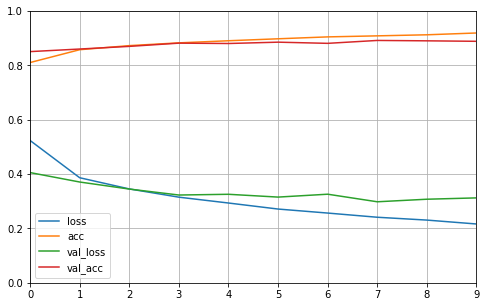

In [43]:
plot_learning_curves(history)

The experiments results between different choices of the model structure shows that the non-linear activation function of ‘ReLU’ and 'sigmoid', the loss function of ‘sparse_categorical_crossentropy’ and the optimizerof ‘sgd’ will lead to the model with highest prediction accuracy.

Main benefit of 'ReLU' is that the derivative of ReLu is either 0 or 1, so multiplying by it won't cause weights that are further away from the end result of the loss function to suffer from the vanishing gradient problem. Sigmoid will not blowing up activation but tend to vanish gradient.

One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

Optimizers perform differently depending on the problem and parametrization. SGD is a good fit to most problem,but in this problem Adam may be better, advantages of Adam include: Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum) and usually works well even with a little tuning of hyperparameters (except alpha).

#### 3. Run Support Vector Machine with three different kernels: Radial, polynomial, and sigmoid.

In [44]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [45]:
#read files
f1 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw2/sonar_train1.csv',sep=',', header = None, skiprows = 1)
f2 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw2/sonar_test1.csv',sep=',', header = None, skiprows = 1)

#read training data
X = f1.loc[:,:59].values
Y = f1.loc[:,60].values

#read testing data
X_test = f2.loc[:,:59].values
Y_test = f2.loc[:,60].values

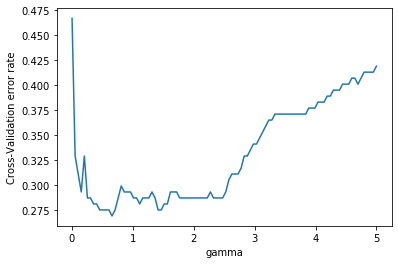

radical kernel: 
error rate = 0.219512 



In [47]:
#radical kernel
grid_r = GridSearchCV(SVC(kernel='rbf'),param_grid={'gamma': np.linspace(0.001,5,100)},cv=10, scoring='accuracy', verbose=0, n_jobs=-1)
grid_r.fit(X,Y)
er = 1 - grid_r.cv_results_['mean_test_score']
gamma = np.linspace(0.001,5,100)
#plot
plt.plot(gamma, er)
plt.xlabel('gamma')
plt.ylabel('Cross-Validation error rate')
plt.show()

rbf_svc = SVC(kernel='rbf',gamma=grid_r.best_params_['gamma'])
rbf_svc.fit(X,Y)
test_error_rate=1-rbf_svc.score(X_test,Y_test) #testing error rate
print('radical kernel: \nerror rate = {:f} \n'.format(test_error_rate))



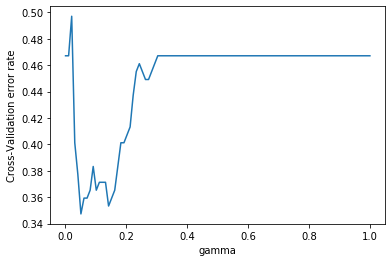

sigmoid kernel: 
error rate = 0.390244 



In [48]:
#sigmoid kernel
grid_s = GridSearchCV(SVC(kernel='sigmoid'),param_grid={'gamma': np.linspace(0.001,1,100)},cv=10, scoring='accuracy', verbose=0, n_jobs=-1)
grid_s.fit(X,Y)
er = 1 - grid_s.cv_results_['mean_test_score']
gamma = np.linspace(0.001,1,100)
#plot
plt.plot(gamma, er)
plt.xlabel('gamma')
plt.ylabel('Cross-Validation error rate')
plt.show()

sigmoid_svc = SVC(kernel='sigmoid',gamma=grid_s.best_params_['gamma'])
sigmoid_svc.fit(X,Y)
test_error_rate=1-sigmoid_svc.score(X_test,Y_test) #testing error rate
print('sigmoid kernel: \nerror rate = {:f} \n'.format(test_error_rate))


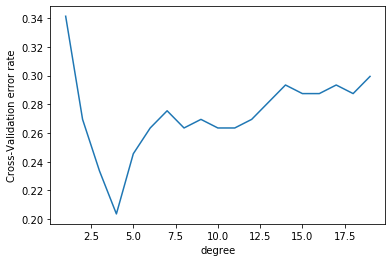

polynomial kernel: 
error rate = 0.219512 



In [49]:
# polynomial kernel
grid_p = GridSearchCV(SVC(kernel='poly',gamma='scale'),param_grid={'degree': np.arange(1, 20, 1)},cv=10, scoring='accuracy', verbose=0,n_jobs=-1)
grid_p.fit(X,Y)
er = 1-grid_p.cv_results_['mean_test_score']
degree =  np.arange(1,20,1)
#plot
plt.plot(degree, er)
plt.xlabel('degree')
plt.ylabel('Cross-Validation error rate')
plt.show()

poly_svc = SVC(kernel='poly',gamma=grid_p.best_params_['degree'])
poly_svc.fit(X,Y)
test_error_rate=1-poly_svc.score(X_test,Y_test) #testing error rate
print('polynomial kernel: \nerror rate = {:f} \n'.format(test_error_rate))



#### 4. Run Random Forest on the training data. Keeping all other parameter at default, fit the model using different number of trees (10, 20, 30,……, 1000).

In [50]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [51]:
def Error_rate(X2,Y2,forest):
    s = X2.shape[0]
    n = 0
    Y_p = forest.predict(X2)
    for i, y in enumerate(Y_p):
        if (y != Y2[i]):#error_rate = #points whose predict class is different form original one/#total points
            n += 1
    return n/float(s) 

In [52]:
#read files
f1 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw2/sonar_train1.csv',sep=',', header = None, skiprows = 1)
f2 = pd.read_csv('/Users/mengjiawei/Desktop/534/hw2/sonar_test1.csv',sep=',', header = None, skiprows = 1)


#read training data
X = f1.loc[:,:59].values
Y = f1.loc[:,60].values

#read testing data
X_test = f2.loc[:,:59].values
Y_test = f2.loc[:,60].values

In [53]:
# Range of n_estimators values to explore.
min_estimators = 10
max_estimators = 1000
step = 10
number_estimators = (max_estimators - min_estimators)//step #how many trees

print (number_estimators)

error_rate = []
n_estimators = []

#use Random Forest 
#oob_score : bool (default=False) :Whether to use out-of-bag samples to estimate the generalization accuracy.
for i in range(min_estimators, max_estimators + step,step):
    clf = RandomForestClassifier(oob_score=True)
    clf.set_params(n_estimators=i)
    clf.fit(X, Y)

    # Record the OOB error for each n_estimators=i setting.
    oob_error = 1 - clf.oob_score_
    n_estimators.append(i)
    error_rate.append(oob_error)
    print (i,oob_error)

last_oob_error = error_rate[number_estimators] #oob error of n = 1000
last_oob_error
stabilize_estimator = 0
#number of trees based on when the OOB error rate first stabilizes 
for i in range(number_estimators):
    diff_rate = abs((error_rate[i] - last_oob_error)/float(last_oob_error))
    print (i, diff_rate)
    if (diff_rate <=0.01):
        stabilize_estimator = n_estimators[i] 
        print (stabilize_estimator)
        break
    
print (stabilize_estimator) #the stablize tree number


99
10 0.2574850299401198
20 0.19161676646706582
30 0.20359281437125754
40 0.16766467065868262
50 0.17365269461077848
60 0.20359281437125754
70 0.20359281437125754
80 0.15568862275449102
90 0.17365269461077848
100 0.17365269461077848
110 0.17964071856287422
120 0.19760479041916168
130 0.16167664670658688
140 0.15568862275449102
150 0.17365269461077848
160 0.15568862275449102
170 0.17964071856287422
180 0.17365269461077848
190 0.16167664670658688
200 0.18562874251497008
210 0.20359281437125754
220 0.18562874251497008
230 0.18562874251497008
240 0.13772455089820357
250 0.15568862275449102
260 0.12574850299401197
270 0.16766467065868262
280 0.16766467065868262
290 0.14970059880239517
300 0.14970059880239517
310 0.16167664670658688
320 0.18562874251497008
330 0.16167664670658688
340 0.14970059880239517
350 0.13772455089820357
360 0.14371257485029942
370 0.15568862275449102
380 0.13173652694610782
390 0.15568862275449102
400 0.15568862275449102
410 0.14371257485029942
420 0.17964071856287422

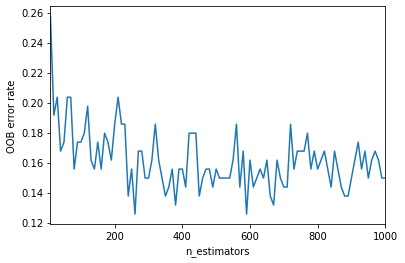

Feature ranking:
1. feature 10 (0.067639)
2. feature 11 (0.059777)
3. feature 9 (0.039726)
4. feature 48 (0.039200)
5. feature 8 (0.035087)
6. feature 51 (0.034703)
7. feature 36 (0.030666)
8. feature 35 (0.027850)
9. feature 46 (0.025517)
10. feature 12 (0.024945)
11. feature 45 (0.023081)
12. feature 47 (0.022619)
13. feature 27 (0.021826)
14. feature 42 (0.020863)
15. feature 44 (0.020684)
16. feature 20 (0.020501)
17. feature 34 (0.019379)
18. feature 3 (0.019090)
19. feature 50 (0.017980)
20. feature 26 (0.017785)
21. feature 19 (0.016637)
22. feature 4 (0.016580)
23. feature 33 (0.015318)
24. feature 17 (0.014388)
25. feature 43 (0.014198)
26. feature 16 (0.013668)
27. feature 5 (0.013436)
28. feature 38 (0.013136)
29. feature 30 (0.012809)
30. feature 32 (0.012129)
31. feature 22 (0.011662)
32. feature 29 (0.011341)
33. feature 7 (0.010802)
34. feature 39 (0.010361)
35. feature 37 (0.010175)
36. feature 31 (0.010165)
37. feature 14 (0.010149)
38. feature 13 (0.009999)
39. featur

In [54]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.plot(n_estimators, error_rate)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators = stabilize_estimator)
forest.fit(X,Y)

#importance and feature
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
error_rate = Error_rate(X_test,Y_test,forest)
print('Random Forest: \nerror rate = {:f} \n'.format(error_rate))